In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [113]:
batch_size = 128  # Kích thước batch
num_classes = 10  # 10 lớp
epochs = 10    # Số epoches

In [114]:
def get_mnist_train():
    with np.load(f"./data/mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

In [115]:
def get_mnist_test():
    with np.load(f"./data/mnist.npz") as f:
        images, labels = f["x_test"], f["y_test"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

In [116]:
X_train, y_train = get_mnist_train()
X_test, y_test = get_mnist_test()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]



In [117]:
weight_1 = np.random.uniform(-0.5, 0.5, (28, 784))
weight_2 = np.random.uniform(-0.5, 0.5, (10,28))
bias_1 = np.zeros((28, 1))
bias_2 = np.zeros((10, 1))

In [118]:

# # convert to one-hot encoding (binary class matrices)
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)
# y_val = np_utils.to_categorical(y_val, num_classes)

In [119]:

model = Sequential()

# input shape
model.add(Dense(28, activation='relu', input_shape=(784,)))
# model.add(Dense(28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 28)                21980     
                                                                 
 dense_24 (Dense)            (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [121]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
          validation_data=(X_val, y_val))
     

Epoch 1/10
298/391 [=====================>........] - ETA: 0s - loss: 0.6477 - accuracy: 0.8210

391/391 [==============================] - 1s 1ms/step - loss: 0.5723 - accuracy: 0.8422 - val_loss: 0.2859 - val_accuracy: 0.9210
Epoch 2/10
391/391 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.9214 - val_loss: 0.2349 - val_accuracy: 0.9352
Epoch 3/10
391/391 [==============================] - 0s 931us/step - loss: 0.2332 - accuracy: 0.9335 - val_loss: 0.2093 - val_accuracy: 0.9425
Epoch 4/10
391/391 [==============================] - 0s 913us/step - loss: 0.2035 - accuracy: 0.9419 - val_loss: 0.1927 - val_accuracy: 0.9478
Epoch 5/10
391/391 [==============================] - 0s 913us/step - loss: 0.1820 - accuracy: 0.9478 - val_loss: 0.1783 - val_accuracy: 0.9499
Epoch 6/10
391/391 [==============================] - 0s 877us/step - loss: 0.1662 - accuracy: 0.9519 - val_loss: 0.1678 - val_accuracy: 0.9537
Epoch 7/10
391/391 [==============================] - 0s 856us/step - loss: 0.1528 - accuracy: 0.9562 - val_loss: 0.1587 - val_accuracy: 0.9550
Epoch 8

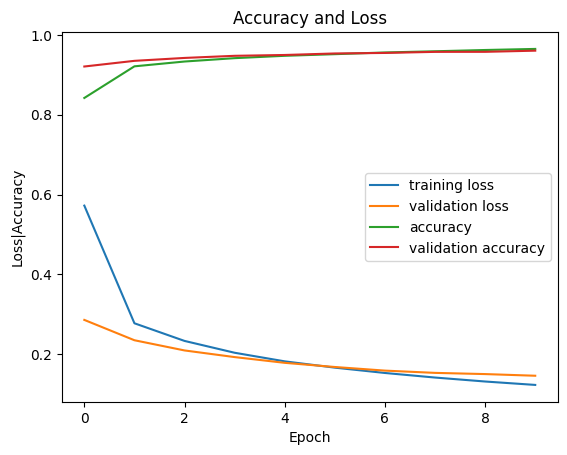

In [122]:

# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
     


313/313 [==============================] - 0s 404us/step
+ precision = 0.958
+ recall = 0.958
+ f1_score = 0.958


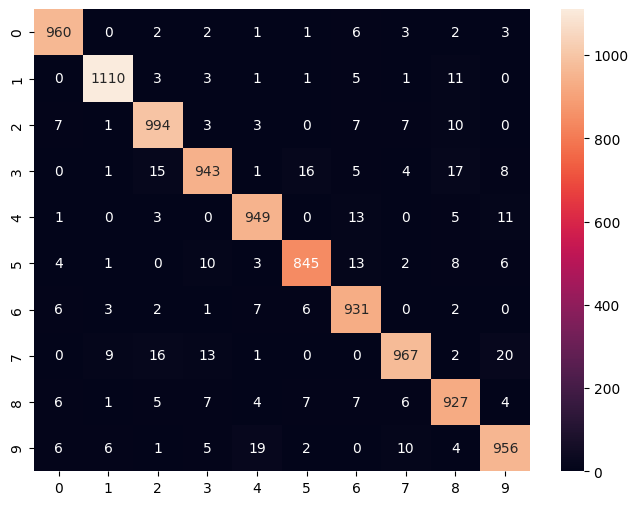

In [123]:


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
plt.show()


Learning rate = 0.100000

Learning rate = 0.005000

Learning rate = 0.010000

Learning rate = 0.000010

Learning rate = 0.200000


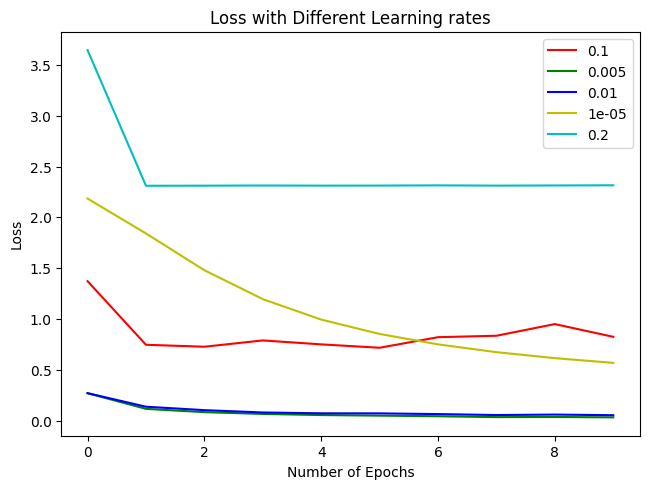

In [124]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):
  model = Sequential()
  
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


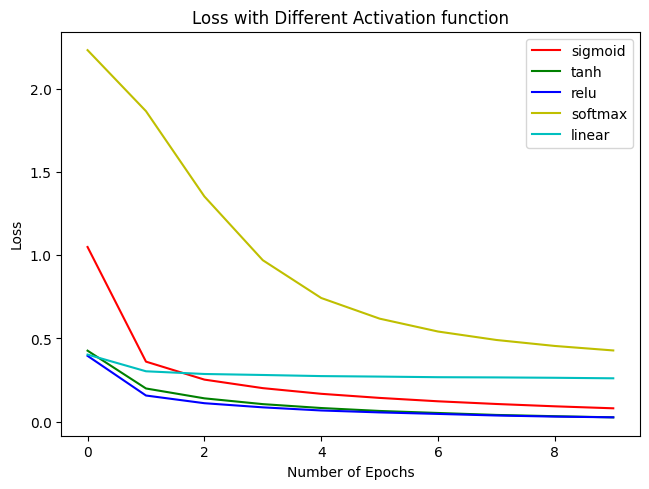

In [125]:

# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
for i, af in enumerate(activation_function):
  model = Sequential()
  
  model.add(Dense(128, activation=af, input_shape=(784,)))
  model.add(Dense(32, activation=af))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()